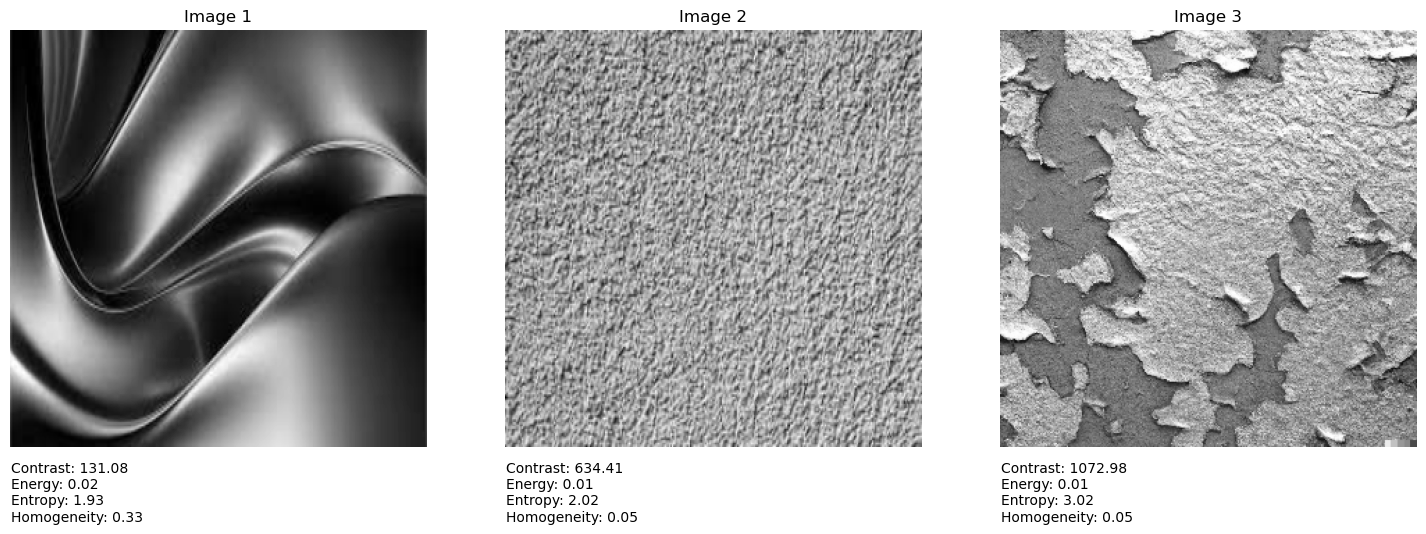

In [1]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import matplotlib.pyplot as plt

# Function to plot GLCM matrix
def plot_glcm(glcm, label, ax):
    ax.imshow(glcm[:, :, 0, 0], cmap='gray', interpolation='nearest')
    ax.set_title(f'GLCM Matrix - {label}')
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Pixel Intensity')
    ax.colorbar()

# Function to plot images and texture features in subplots
def plot_images_and_texture_features(images, glcms, texture_features, image_titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i in range(num_images):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(image_titles[i])
        axes[i].axis('off')
        
        contrast = texture_features[i]['contrast']
        energy = texture_features[i]['energy']
        entropy = texture_features[i]['entropy']
        homogeneity = texture_features[i]['homogeneity']
        
        text = f"Contrast: {contrast:.2f}\nEnergy: {energy:.2f}\nEntropy: {entropy:.2f}\nHomogeneity: {homogeneity:.2f}"
        axes[i].text(0, images[i].shape[0]+10, text, fontsize=10, va='top', ha='left')

    fig.tight_layout()
    plt.show()

# Load images and resize them
image_paths = ['/Users/nandinidhiran/Downloads/smooth.jpeg', '/Users/nandinidhiran/Downloads/rough.jpeg', 
               '/Users/nandinidhiran/Downloads/mixed.png']
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]
images_resized = [cv2.resize(image, (300, 300)) for image in images]  # Resize images
image_titles = ['Image 1', 'Image 2', 'Image 3']

# Define GLCM properties
distance = 1
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Compute GLCM and texture features for each image
glcms = [graycomatrix(image, distances=[distance], angles=angles, levels=256, symmetric=True, normed=True)
         for image in images_resized]

texture_features = []
for glcm in glcms:
    contrast = np.mean(graycoprops(glcm, 'contrast'))
    energy = np.mean(graycoprops(glcm, 'energy'))
    entropy = shannon_entropy(glcm.ravel())
    homogeneity = np.mean(graycoprops(glcm, 'homogeneity'))
    texture_features.append({'contrast': contrast, 'energy': energy, 'entropy': entropy, 'homogeneity': homogeneity})

# Plot images and texture features in subplots
plot_images_and_texture_features(images_resized, glcms, texture_features, image_titles)
